##  <font color='Blue'>Import importance library </font> 

> # DATA EXPLORATION

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler

##### Read CSV. FILE


> #### ได้ทำการเพิ่ม Non ASCII เข้าไปใน Data 

In [4]:
data = pd.read_csv("./Resoures/Data_example.csv")
data

,X,Y,Z
0,19,1927,cat
1,NaN,2300,dog
2,15,NaN,bird
3,16,5959,cat
4,16,AB,cat
5,NaN,4594,dog
6,19,1927,cat
7,20,2879,bird���
8,21,NaN,NaN
9,0,4096,cat


In [5]:
data.info(verbose="true")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X       17 non-null     object
 1   Y       17 non-null     object
 2   Z       18 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


---

> # DATA CLEANING

---

### Correct Errors (delete non ASCII)

> #### Replace every samples that ASCII with empty string

In [6]:
data.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
data

,X,Y,Z
0,19,1927,cat
1,NaN,2300,dog
2,15,NaN,bird
3,16,5959,cat
4,16,AB,cat
5,NaN,4594,dog
6,19,1927,cat
7,20,2879,bird
8,21,NaN,NaN
9,0,4096,cat


> ##### พบว่าตัวอักษรภาษาไทย หรืออักขระพิเศษนั้นถูกแทนที่ด้วย Empty String

## Convert data type from object to suitable types

> #### แทนค่า samples ที่ไม่ได้เป็น numberic ให้เป็น NaN

In [7]:
data = data[(~data.duplicated()) | (data['X'].isnull())].reset_index(drop=True)

In [8]:
data['X'] = pd.to_numeric(data['X'],errors='coerce' , downcast="signed")
data['Y'] = pd.to_numeric(data['Y'],errors='coerce'  )
#แทนค่า samples ที่ไม่ได้เป็น numberic ให้เป็น NaN
data

,X,Y,Z
0,19.0,1927.0,cat
1,NaN,2300.0,dog
2,15.0,NaN,bird
3,16.0,5959.0,cat
4,16.0,NaN,cat
5,NaN,4594.0,dog
6,20.0,2879.0,bird
7,21.0,NaN,NaN
8,0.0,4096.0,cat
9,NaN,6730.0,cat


In [9]:
data.info(verbose="true")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       14 non-null     float64
 1   Y       14 non-null     float64
 2   Z       16 non-null     object 
dtypes: float64(2), object(1)
memory usage: 560.0+ bytes


In [10]:
data.describe()

,X,Y
count,14.000000,14.00000
mean,91.857143,3817.00000
std,261.717069,1837.61074
min,0.000000,0.00000
25%,16.000000,2629.25000
50%,20.500000,4137.00000
75%,35.250000,4867.75000
max,1000.000000,6730.00000


## Drop rows with NA > 1

In [11]:
data.head()

,X,Y,Z
0,19.0,1927.0,cat
1,NaN,2300.0,dog
2,15.0,NaN,bird
3,16.0,5959.0,cat
4,16.0,NaN,cat


In [12]:
data.dropna(thresh=2).reset_index(drop=True)

,X,Y,Z
0,19.0,1927.0,cat
1,NaN,2300.0,dog
2,15.0,NaN,bird
3,16.0,5959.0,cat
4,16.0,NaN,cat
5,NaN,4594.0,dog
6,20.0,2879.0,bird
7,0.0,4096.0,cat
8,NaN,6730.0,cat
9,25.0,0.0,bird


## Replace NAN ( X,Y with mean value , Z with  previous rows )

In [13]:
data.describe()

,X,Y
count,14.000000,14.00000
mean,91.857143,3817.00000
std,261.717069,1837.61074
min,0.000000,0.00000
25%,16.000000,2629.25000
50%,20.500000,4137.00000
75%,35.250000,4867.75000
max,1000.000000,6730.00000


In [14]:
data.fillna(data.median(),inplace=True)
currect_data = data.fillna(method="ffill")
currect_data

,X,Y,Z
0,19.0,1927.0,cat
1,20.5,2300.0,dog
2,15.0,4137.0,bird
3,16.0,5959.0,cat
4,16.0,4137.0,cat
5,20.5,4594.0,dog
6,20.0,2879.0,bird
7,21.0,4137.0,bird
8,0.0,4096.0,cat
9,20.5,6730.0,cat


----

# Tranfrom Data

----

In [15]:
minmax_scaler = MinMaxScaler()
std_scaler = StandardScaler()

In [16]:
currect_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       18 non-null     float64
 1   Y       18 non-null     float64
 2   Z       18 non-null     object 
dtypes: float64(2), object(1)
memory usage: 560.0+ bytes


In [17]:
currect_data[['X','Y']] = minmax_scaler.fit_transform(currect_data[['X','Y']])
norm_data = currect_data

In [18]:
norm_data

,X,Y,Z
0,0.0190,0.286330,cat
1,0.0205,0.341753,dog
2,0.0150,0.614710,bird
3,0.0160,0.885438,cat
4,0.0160,0.614710,cat
5,0.0205,0.682615,dog
6,0.0200,0.427786,bird
7,0.0210,0.614710,bird
8,0.0000,0.608618,cat
9,0.0205,1.000000,cat


> #### Blockplot

In [19]:
def _boxplot(data,col):
    sns.boxplot(x=data[col] ,fliersize=10,whis=50 ,dodge=False ,color="red" )
    
def _plot(df,cols):
    plt.figure(figsize=(16,4))
    #histrogram
    plt.subplot(1,2,1)
    plt.hist(df[cols],alpha = 1)
    #box
    plt.subplot(1,2,2)
    sns.boxplot(df[cols])
    plt.show()

C:\Users\ACER-OAT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


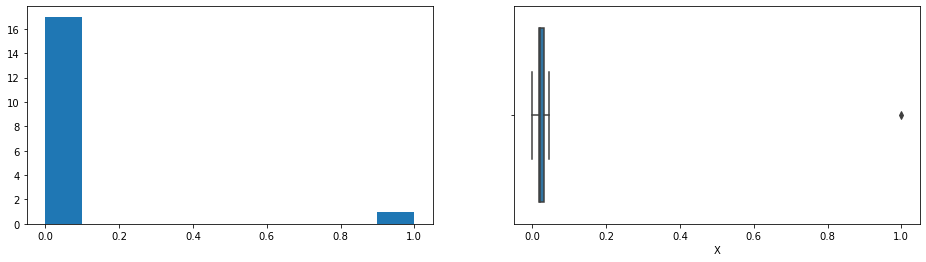

In [20]:
_plot(norm_data,'X')

C:\Users\ACER-OAT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


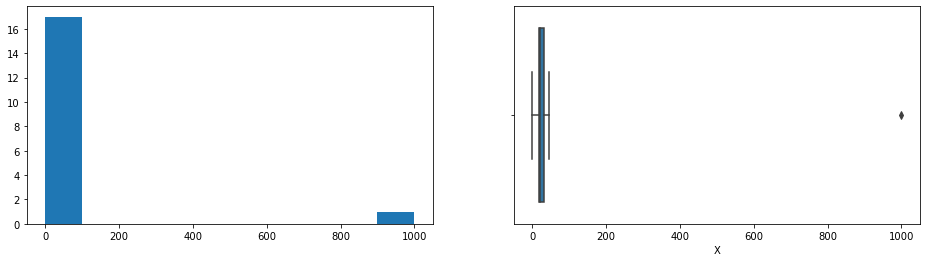

In [21]:
_plot(data,'X')

C:\Users\ACER-OAT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


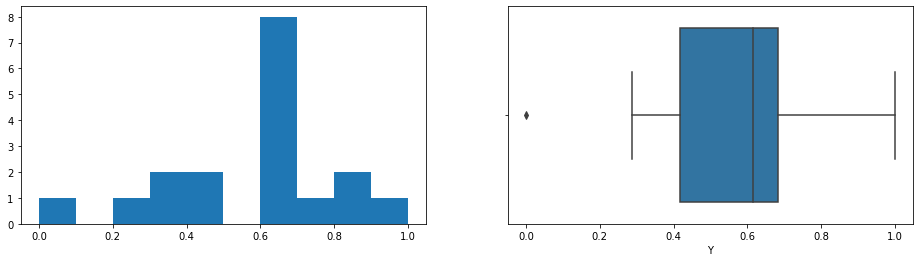

In [22]:
_plot(norm_data,"Y")

C:\Users\ACER-OAT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


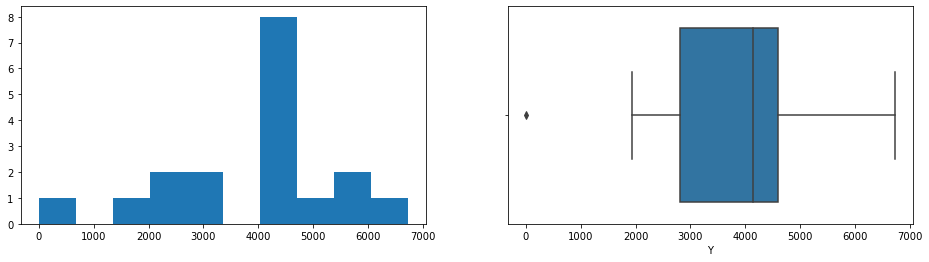

In [23]:
_plot(data,"Y")

## Remove outliers 

In [24]:
norm_data.describe()

,X,Y
count,18.000000,18.000000
mean,0.076000,0.577728
std,0.230892,0.239638
min,0.000000,0.000000
25%,0.016750,0.418091
50%,0.020500,0.614710
75%,0.031000,0.682095
max,1.000000,1.000000


In [25]:
def _findQ (df, cols):
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower ,upper ,IQR

In [26]:
lower_x , upper_x ,IQR = _findQ(currect_data,"X")
lower_y , upper_y ,IQR = _findQ(currect_data,"Y")
print("lower of x :",lower_x)
print("upper of x :",upper_x)
print("===================")
print("lower of y :",lower_y)
print("upper of y :",upper_y)

lower of x : -0.004624999999999997
upper of x : 0.052375
lower of y : 0.0220839524517088
upper of y : 1.0781017830609212


In [27]:
norm_data

,X,Y,Z
0,0.0190,0.286330,cat
1,0.0205,0.341753,dog
2,0.0150,0.614710,bird
3,0.0160,0.885438,cat
4,0.0160,0.614710,cat
5,0.0205,0.682615,dog
6,0.0200,0.427786,bird
7,0.0210,0.614710,bird
8,0.0000,0.608618,cat
9,0.0205,1.000000,cat


In [40]:
outliers_x = np.where(norm_data["X"] > upper_x ,True ,np.where(norm_data['X'] < lower_x ,True ,False) ) 
outliers_y = np.where(norm_data["Y"] > upper_y ,True ,np.where(norm_data['Y'] < lower_y ,True ,False) ) 
outliers_x

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [29]:
norm_data['X'] = norm_data['X'].loc[~(outliers_x)]
norm_data['Y'] = norm_data['Y'].loc[~(outliers_y)]
cleaned_data =norm_data
cleaned_data

,X,Y,Z
0,0.0190,0.286330,cat
1,0.0205,0.341753,dog
2,0.0150,0.614710,bird
3,0.0160,0.885438,cat
4,0.0160,0.614710,cat
5,0.0205,0.682615,dog
6,0.0200,0.427786,bird
7,0.0210,0.614710,bird
8,0.0000,0.608618,cat
9,0.0205,1.000000,cat


In [30]:
engineered_data = cleaned_data.dropna(how="any").reset_index(drop = True)

In [41]:
engineered_data[['X','Y']] = minmax_scaler.fit_transform(engineered_data[['X','Y']])
engineered_data

,X,Y,Z,Z-category,bird,cat,dog
0,0.422222,0.000000,cat,1,0.0,1.0,0.0
1,0.455556,0.077660,dog,2,0.0,0.0,1.0
2,0.333333,0.460129,bird,0,1.0,0.0,0.0
3,0.355556,0.839475,cat,1,0.0,1.0,0.0
4,0.355556,0.460129,cat,1,0.0,1.0,0.0
5,0.455556,0.555278,dog,2,0.0,0.0,1.0
6,0.444444,0.198209,bird,0,1.0,0.0,0.0
7,0.466667,0.460129,bird,0,1.0,0.0,0.0
8,0.000000,0.451593,cat,1,0.0,1.0,0.0
9,0.455556,1.000000,cat,1,0.0,1.0,0.0


C:\Users\ACER-OAT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


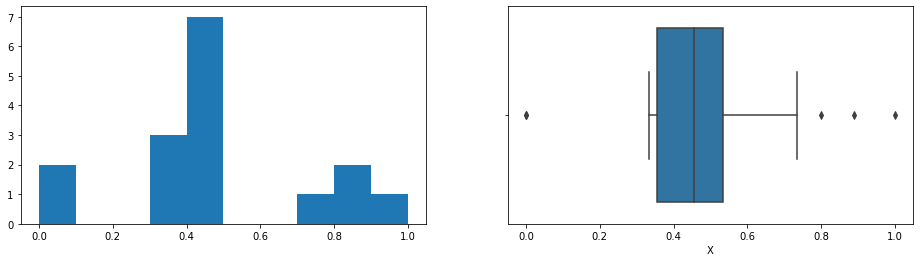

In [42]:
_plot(engineered_data,"X")

C:\Users\ACER-OAT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


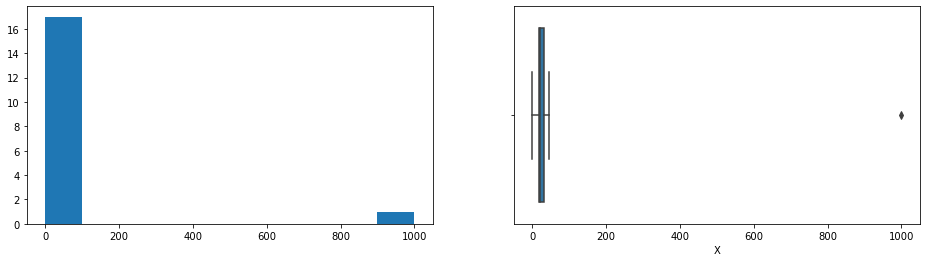

In [34]:
_plot(data,"X")

C:\Users\ACER-OAT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


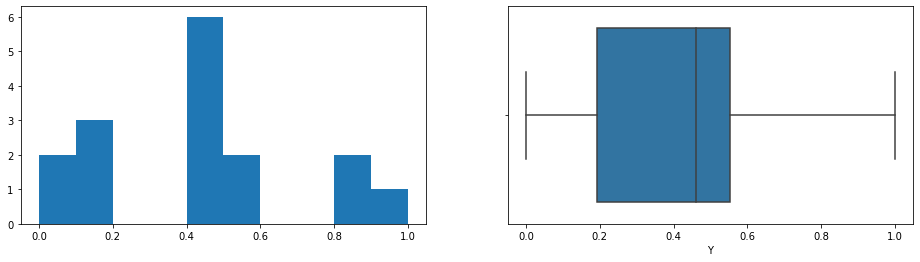

In [35]:
_plot(engineered_data,"Y")

C:\Users\ACER-OAT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


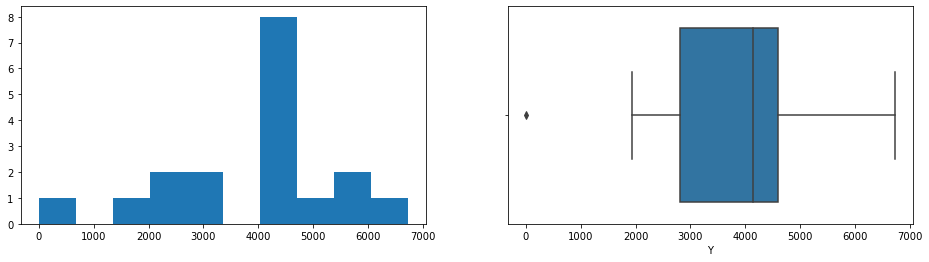

In [36]:
_plot(data,"Y")

-----------

# Label Encoder

-----------

In [37]:
le = preprocessing.LabelEncoder()
engineered_data["Z-category"] = le.fit_transform(engineered_data['Z'])
engineered_data

,X,Y,Z,Z-category
0,0.422222,0.000000,cat,1
1,0.455556,0.077660,dog,2
2,0.333333,0.460129,bird,0
3,0.355556,0.839475,cat,1
4,0.355556,0.460129,cat,1
5,0.455556,0.555278,dog,2
6,0.444444,0.198209,bird,0
7,0.466667,0.460129,bird,0
8,0.000000,0.451593,cat,1
9,0.455556,1.000000,cat,1


-----

# OneHot Encoder

-----

In [38]:
ohe = preprocessing.OneHotEncoder()
df_onehot = pd.DataFrame(ohe.fit_transform(engineered_data[['Z-category']]).toarray())
df_onehot

,0,1,2
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
5,0.0,0.0,1.0
6,1.0,0.0,0.0
7,1.0,0.0,0.0
8,0.0,1.0,0.0
9,0.0,1.0,0.0


In [39]:
engineered_data[['bird','cat','dog']] = df_onehot
engineered_data

,X,Y,Z,Z-category,bird,cat,dog
0,0.422222,0.000000,cat,1,0.0,1.0,0.0
1,0.455556,0.077660,dog,2,0.0,0.0,1.0
2,0.333333,0.460129,bird,0,1.0,0.0,0.0
3,0.355556,0.839475,cat,1,0.0,1.0,0.0
4,0.355556,0.460129,cat,1,0.0,1.0,0.0
5,0.455556,0.555278,dog,2,0.0,0.0,1.0
6,0.444444,0.198209,bird,0,1.0,0.0,0.0
7,0.466667,0.460129,bird,0,1.0,0.0,0.0
8,0.000000,0.451593,cat,1,0.0,1.0,0.0
9,0.455556,1.000000,cat,1,0.0,1.0,0.0


 > # THANK 